This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


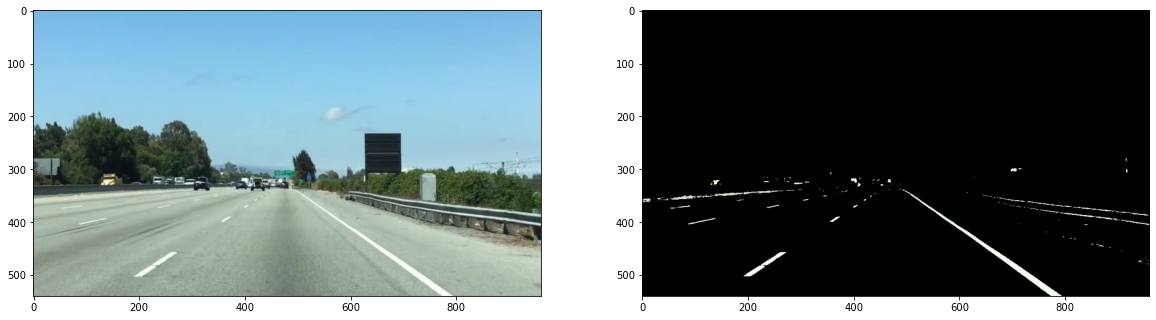

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image and print out some stats
image = mpimg.imread('test.jpg')
print('This image is:', type(image), 'with dimensions:', image.shape)

#Creat figure
fig = plt.figure(figsize=(20,20))
#setting values to rows and column variables
rows = 1
columns = 2

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]

# Note : always make a copy rather than simply using "="
color_select = np.copy(image)
original_image = np.copy(image)
#Define our color selection criteria
#Note: if you run this code, you'll find these are not sensible values!!
#But you will get a chance to play with them soon in a quiz
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

#Identify pixels below the threshhold
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]

#Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
#Display the image
plt.imshow(original_image)

#Adds a subplot at the 2nd position
fig.add_subplot(rows, columns,2)
#Display the image
plt.imshow(color_select)


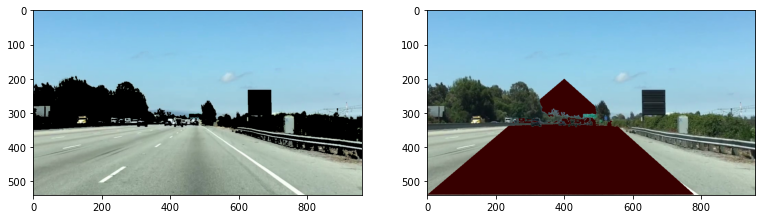

In [65]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('test.jpg')

#Creat figure
fig = plt.figure(figsize=(20,20))
#setting values to rows and column variables
rows = 1
columns = 3

# Grab the x and y sizes and make two copies of the image
# With one copy we'll extract only the pixels that meet our selection,
# Then we'll paint those pixels red in the original image to see our selection
# overlaid on the original.
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define our color criteria
red_threshold = 100
green_threshold = 0
blue_threshold = 0
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define a trinagle region of interest (Note: if you run this code,
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# You'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz ;)
left_bottom = [0, 539]
right_bottom = [780, 539]
apex = [400, 200]

fit_left = np.polyfit((left_bottom[0],apex[0]),(left_bottom[1],apex[1]), 1)
fit_right = np.polyfit((right_bottom[0],apex[0]),(right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0],right_bottom[0]),(left_bottom[1],right_bottom[1]),1)

# Find the region inside the lines
XX, YY  = np.meshgrid(np.arange(0,xsize), np.arange(0,ysize))

region_thresholds = \
(YY > (XX*fit_left[0]  + fit_left[1])) & \
(YY > (XX*fit_right[0] + fit_right[1] )) & \
(YY < (XX*fit_bottom[0]+ fit_bottom[1] ))

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | (image[:,:,1] < rgb_threshold[1]) | (image[:,:,2] < rgb_threshold[2])

# Mask color selection
color_select[color_thresholds] = [0,0,0]
# Find where image is both colored right and in the region
line_image[~color_thresholds & region_thresholds ] = [55,0,0]

#Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
#Display the image
plt.imshow(color_select)

#Adds a subplot at the 2nd position
fig.add_subplot(rows, columns,2)
#Display the image
plt.imshow(line_image)

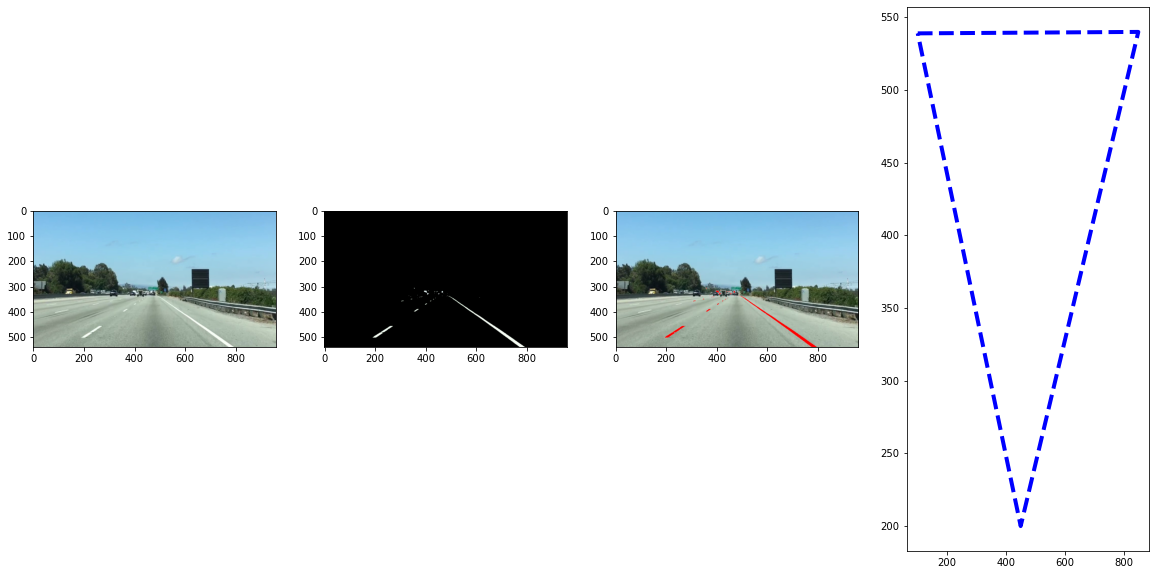

In [82]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('test.jpg')

#Creat figure
fig = plt.figure(figsize=(20,10))
#setting values to rows and column variables
rows = 1
columns = 4

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION 
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [100, 539]
right_bottom = [850, 540]
apex = [450, 200]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
                    
# Mask color and region selection
#
color_select[color_thresholds | ~region_thresholds ] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds ] = [255, 0, 0]


#Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
#Display the image
plt.imshow(image)

#Adds a subplot at the 2nd position
fig.add_subplot(rows, columns,2)
#Display the image
plt.imshow(color_select)

#Adds a subplot at the 3rd position
fig.add_subplot(rows, columns,3)
#Display the image
plt.imshow(line_image)

#Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
#Display the plot
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)

In [44]:
#answer of Quiz:

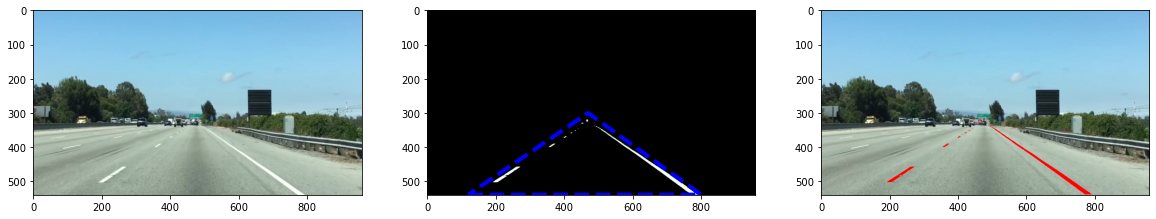

In [45]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('test.jpg')

#Creat figure
fig = plt.figure(figsize=(20,10))
#setting values to rows and column variables
rows = 1
columns = 3

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a triangular mask
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION 
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [120, 539]
right_bottom = [800, 539]
apex = [470, 300]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0])  | \
                   (image[:,:,1] < rgb_threshold[1])  | \
                   (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1]))    & \
                    (YY > (XX*fit_right[0] + fit_right[1]))  & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))


# Display the image and show region and color selections


x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]

# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]

# Color pixels red where both color and region selections met
line_image[~color_thresholds  & region_thresholds] = [255,0, 0]



#-----------------------------------------------------
#Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
#Display the image
plt.imshow(image)

#Adds a subplot at the 2nd position
fig.add_subplot(rows, columns,2)
#Display the image
plt.plot(x, y, 'b--', lw=4)
plt.imshow(color_select)

#Adds a subplot at the 3rd position
fig.add_subplot(rows, columns,3)
#Display the image
plt.imshow(line_image)

#Adds a subplot at the 4th position
#fig.add_subplot(rows, columns, 4)
#Display the plot
#x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
#y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
#plt.plot(x, y, 'b--', lw=4)

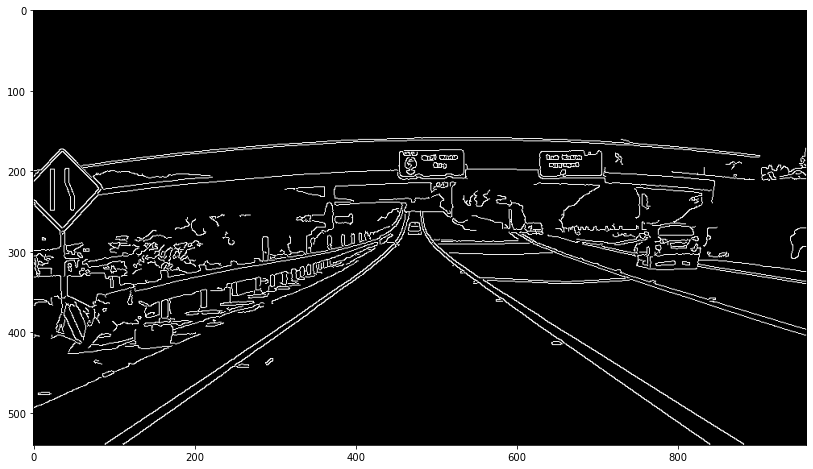

In [7]:
#doing all the relevant imports 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 
import cv2

# Read in the image and convert to grayscale 
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring 
# Note : this step is optional as cv2.Canny() applies a 5x5 Gaussian interanlly 
kernel_size = 3
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

# Define parameters for Canny and run it 
# Note: if you try to run this code you might want to change these!
low_threshold = 60
high_threshold = 180
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Disply the image 
plt.figure(figsize=(15,8))
plt.imshow(edges, cmap = 'Greys_r')
#----------------------------------------------------
#Now just wrote the output to the .txt file
color_edges = np.dstack((edges,edges,edges)) 

f = open('output.txt','w')
g = open('output2.txt', 'w')

f.write(str(edges))
f.close()
g.write(str(color_edges))
g.close()

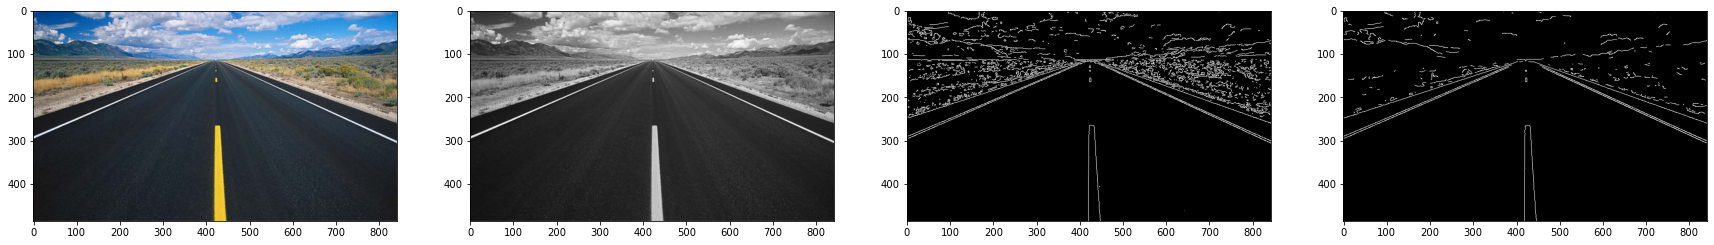

In [2]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np
import cv2
# ------------------------------------------------------------------------------
# Read in the image and convert it to grayscale
image = mpimg.imread('ROAD.jpg')
gray= cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #grayscale conversion
# ------------------------------------------------------------------------------
# We'll also incule Gaussian smoothing before running canny.
# Define a kernel size for Gaussian smoothing / blurring
# Note: this step is optional as cv.Canny() applies a 5x5 Gausssian internally
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)
# ------------------------------------------------------------------------------
# Define parameters for Canny and run it
# Note : if you try running this code you might want to change these !
low_threshold = 150
high_threshold = 200
edges1 = cv2.Canny(gray,low_threshold, high_threshold)
edges2 = cv2.Canny(blur_gray, low_threshold, high_threshold)
#---------------------------------------------------
#Define figure for plotting images besides each other.
fig = plt.figure(figsize=(30,10))
rows = 1
columns = 4
#---------------------------------------------------
fig.add_subplot(rows, columns,1)
plt.imshow(image)
####
fig.add_subplot(rows,columns,2)
plt.imshow(gray, cmap= 'gray')
#----------------------------------------------------
fig.add_subplot(rows, columns,3)
plt.imshow(edges1, cmap='Greys_r')
#----------------------------------------------------
fig.add_subplot(rows, columns,4)
plt.imshow(edges2, cmap='Greys_r')

BB=  [[1, 2, 3, 4], [5, 6, 7, 8]]
AA=  [[1, 2, 3, 4], [5, 6, 7, 8]]


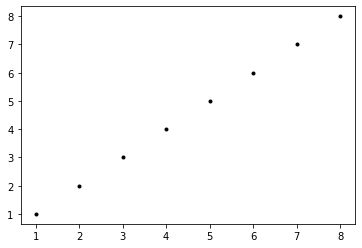

In [37]:
BB = [[1,2,3,4],[5,6,7,8]]
AA = [[1,2,3,4],[5,6,7,8]]


print('BB= ',BB)
print('AA= ',AA)
plt.plot(AA,BB,marker='.', color = 'k', linestyle ='none')



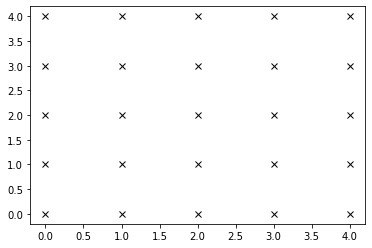

In [46]:
xvalues = np.array([0,1,2,3,4])
yvalues = np.array([0,1,2,3,4])

xx, yy = np.meshgrid(xvalues,yvalues)
plt.plot(xx,yy, marker='x', color = 'k', linestyle = 'none')